In [65]:
# User Loyalty Analysis, e-commerce
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [5]:
df = pd.read_csv(r'C:\Users\User\Desktop\j\lessons\lesson_3\lesson_3_data.csv', encoding = 'cp1251')

In [6]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [8]:
user_df = df[['tc', 'art_sp']]
user_df

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [10]:
user_df = user_df.rename(columns = {'tc':'user_id', 'art_sp':'brand_info'})

In [15]:
user_df['brand_name'] = user_df.brand_info.apply(lambda x: x.split(' ')[-1])
user_df

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2
...,...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4,Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4,Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand,Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand,Store_Brand


In [20]:
users_purchases = user_df.groupby('user_id', as_index = False) \
    .agg({'brand_name':'count'}) \
    .rename(columns = {'brand_name':'purchases'})
users_purchases.head()

,user_id,purchases
0,-1236394515,1
1,1031,6
2,4241,5
3,17311,2
4,17312,2


In [22]:
users_purchases.purchases.median()

2.0

In [25]:
users_purchases.describe()

,user_id,purchases
count,1.176400e+04,11764.000000
mean,7.690517e+07,4.091210
std,1.622210e+08,4.573143
min,-1.236395e+09,1.000000
25%,1.503761e+07,1.000000
50%,4.682179e+07,2.000000
75%,9.311601e+07,5.000000
max,1.408849e+09,60.000000


In [51]:
# Total number of purchases per user, selecting those with more than 5
users_purchases = user_df.groupby('user_id', as_index = False) \
    .agg({'brand_name':'count'}) \
    .rename(columns = {'brand_name':'purchases'}) \
    .query('purchases >= 5')
users_purchases.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [52]:
# Number of unique brands for each user
users_unique_brands = user_df.groupby('user_id', as_index = False) \
    .agg({'brand_name': pd.Series.nunique}) \
    .rename(columns = {'brand_name':'unique_brands'})
users_unique_brands.head()

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


In [53]:
# Finding the brand with the maximum number of purchases for each user
users_fav_brand_purchases = user_df.groupby(['user_id','brand_name'], as_index = False) \
    .agg({'brand_info':'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending = [False, False]) \
    .groupby('user_id') \
    .head(1) \
    .rename(columns = {'brand_info':'purchases', 'brand_name':'fav_brand'})
users_fav_brand_purchases.head()

,user_id,fav_brand,purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2


In [60]:
loyalty_df = users_purchases \
    .merge(users_unique_brands, on = 'user_id') \
    .merge(users_fav_brand_purchases, on = 'user_id') \
    .rename(columns = {'purchases_x':'all_purchases', 'purchases_y':'fav_brand_purchases'})
loyalty_df.head()

,user_id,all_purchases,unique_brands,fav_brand,fav_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


In [57]:
loyal_users = loyalty_df[loyalty_df.unique_brands == 1]

In [61]:
loyalty_df['loyalty_score'] = loyalty_df.fav_brand_purchases / loyalty_df.all_purchases
loyalty_df.head()

,user_id,all_purchases,unique_brands,fav_brand,fav_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000


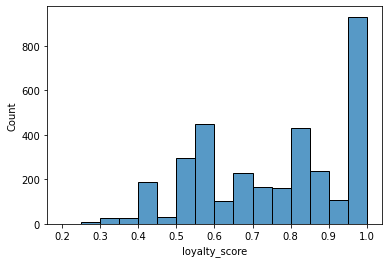

In [69]:
ax = sns.histplot(loyalty_df.loyalty_score)

In [76]:
brand_loyalty = loyalty_df.groupby('fav_brand', as_index = False) \
    .agg({'loyalty_score':'median', 'user_id':'count'})

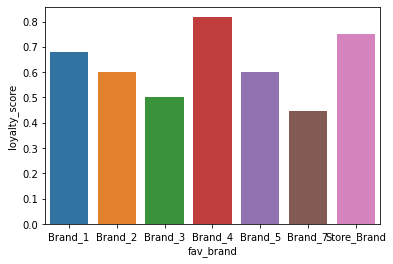

In [77]:
ax = sns.barplot(x='fav_brand', y='loyalty_score', data=brand_loyalty)

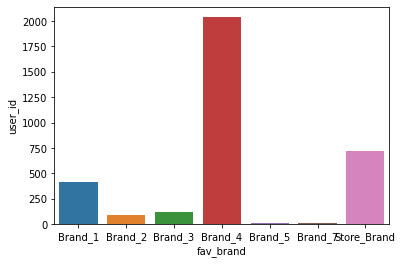

In [78]:
ax = sns.barplot(x='fav_brand', y='user_id', data=brand_loyalty)